In [156]:
#import libraries 
import pandas as pd
pd.options.display.max_rows = 500
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [88]:
# open text files for kings speech and stop words

speech = open('mlk_update.txt').read()
stop_words = open('stopwords.txt').read()

In [89]:
#generate a list for kings speech and stop words

speech_list = speech.split(' ')
stopword_list = stop_words.split(' ')

In [149]:
# Check the list lenght for stopwords and speech
len(speech_list)

1667

In [150]:
len(stopword_list)

394

In [93]:
# transform all word into lower case

speech_word_lower_list = []

for each_word in speech_list:
    speech_word_lower_list.append(each_word.lower())
    

In [94]:
#remove all stop words...the stopwords can be located in the stopwords.txt file

speech_remove_stopword_list = []

for words in speech_word_lower_list:
    if words  not in stopword_list:
        speech_remove_stopword_list.append(words)
        

In [95]:
# Check the list length after stop word were removed.
len(speech_remove_stopword_list)

710

In [79]:
# Generate a dataframe,rename columns, and drop unwanted rows after processing has been performed

df_mlk_speech = pd.value_counts(speech_remove_stopword_list).reset_index()

df_mlk_speech.rename_axis({'index':'Words', 0: 'Count'},axis=1,inplace=True)

df_mlk_speech = df_mlk_speech.drop(df_mlk_speech.index[39])

In [96]:
#filter all words that did not appear more than 3 times in this speech. 

df_mlk_speech = df_mlk_speech[df_mlk_speech['Count'] >= 3]

In [152]:
df_mlk_speech.to_csv('MLK_SPEECH.csv',index=False)

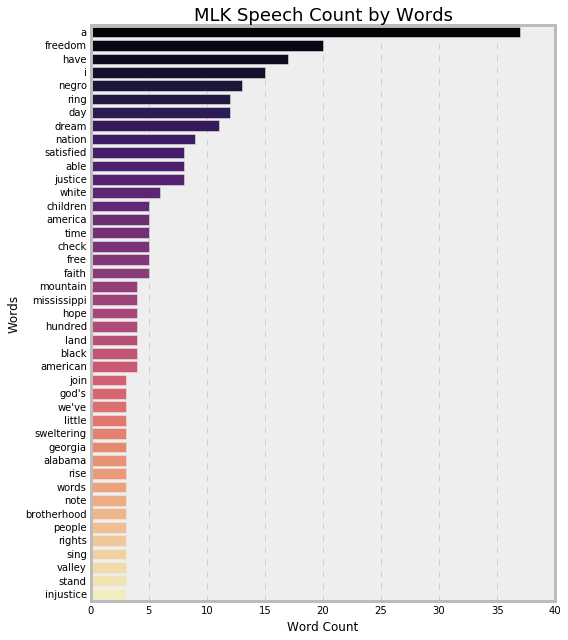

In [159]:
#Generate plot for kings speech

plt.style.use('bmh')
plt.figure(figsize=(8,9))
sns.barplot(x='Count', y='Words', data=df_mlk_speech,palette='magma')
plt.title('MLK Speech Count by Words',fontsize=(18));
plt.xlabel('Word Count')
plt.ylabel('Words')
plt.tight_layout()
plt.savefig('MLK_Speech_Barplot.png')

In [158]:
# use Vader Sentiment Analysis

quote = 'I have a dream'


results = analyzer.polarity_scores(quote)
compound = results["compound"]
pos = results["pos"]
neu = results["neu"]
neg = results["neg"]

# Print Analysis
print(quote)
print("Compound Score:", compound)
print("Positive Score:", pos)
print("Neutral Score:", neu)
print("Negative Score: ", neg)

I have a dream
Compound Score: 0.25
Positive Score: 0.667
Neutral Score: 0.333
Negative Score:  0.0
